In [1]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd

2021-10-01 19:37:11.592520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import json
import re
import glob
import matplotlib.image as mpimg

In [3]:
def spliter(line):
    line = re.split(">", line)
    line = re.split("<", line[1])
    return(line[0])


def create_dataframe(directory_path):
    """
    function that creates a dataframe countaining two columns: ImageId and ImageBoxes
    ImageId is the name of the image (not the path)
    ImageBoxes is a list containing a list for every element spotted in the image arrange in that way:
    [className, xmin, ymin, xmax, ymax]
    """
    
    JPG_counter = len(glob.glob1(directory_path,"*.jpg"))
    XML_counter = len(glob.glob1(directory_path,"*.xml"))
    assert JPG_counter == XML_counter, "jpg and xml are not the same length"
    
    image_boxes_list, image_id_list = [], []
    for dirname, _, filenames in os.walk(directory_path):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            if path.endswith(".xml"):
                f = open(path, 'r')
                image_boxes = []
                for element in f:
                    if "<name>" in element:
                        image_boxes.append(spliter(element))
                    if "<xmin>" in element:
                        image_boxes.append(int(spliter(element)))
                    if "<ymin>" in element:
                        image_boxes.append(int(spliter(element)))
                    if "<xmax>" in element:
                        image_boxes.append(int(spliter(element)))
                    if "<ymax>" in element:
                        image_boxes.append(int(spliter(element)))
                image_id_list.append(filename.split('.')[0])
                image_boxes_list.append(image_boxes)
    df = pd.DataFrame(list(zip(image_id_list, image_boxes_list)),columns =['ImageId', 'ImageBoxes'])
    return(df)

training_directory_path = '/kaggle/input/fruit-images-for-object-detection/train_zip/train'
testing_directory_path = '/kaggle/input/fruit-images-for-object-detection/test_zip/test'

df_train, df_test = create_dataframe(training_directory_path), create_dataframe(testing_directory_path)


In [4]:
df_train

,ImageId,ImageBoxes
0,apple_28,"[apple, 25, 42, 275, 297]"
1,orange_22,"[orange, 75, 96, 531, 465]"
2,apple_65,"[apple, 70, 25, 290, 226, apple, 35, 217, 253,..."
3,orange_41,"[orange, 390, 391, 815, 800]"
4,banana_67,"[banana, 19, 21, 337, 325]"
...,...,...
235,apple_27,"[apple, 51, 3, 414, 350]"
236,apple_63,"[apple, 19, 1, 719, 708]"
237,banana_64,"[banana, 132, 98, 591, 348]"
238,orange_53,"[orange, 324, 291, 692, 680]"


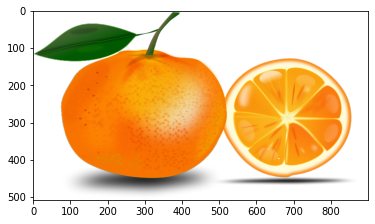

In [5]:
one_image_path = "/kaggle/input/fruit-images-for-object-detection/train_zip/train/"+"orange_22"+'.jpg'
image = mpimg.imread(one_image_path)
imgplot = plt.imshow(image)
plt.show()

In [6]:
import cv2

In [7]:
def resizeImg(imgId):
    path=
    img=cv2.imread(path)
    img_res=cv2.resize(img,(224,224))
    return img_res

    

SyntaxError: invalid syntax (1762422427.py, line 2)

In [ ]:
def tfmbb(bb,h,w):
    bb_=[]
    bb_.append((bb[0]/w))
    bb_.append((bb[1]/h))
    bb_.append((bb[2]/w))
    bb_.append((bb[3]/h))
    return bb_
    
    

In [ ]:
tfmbb([1,2,3,4],400,440)

In [ ]:
df_train.size

In [ ]:
def drop_multis(df):
    l=[]
    for i in range(0,df.shape[0]):
        x=df.iloc[i]
        if len(x['ImageBoxes'])>5:
            l.append(i)
    return l
   

    

In [ ]:
l=drop_multis(df_train)

In [ ]:
df_train=df_train.drop(l)

In [ ]:
l=drop_multis(df_test)

In [ ]:
df_test=df_test.drop(l)

In [ ]:
df_test

In [ ]:
train_labels=[]
train_boxes=[]
for i in range(df_train.shape[0]):
    
    x=df_train.iloc[i]["ImageBoxes"]
    train_labels.append(classes.index(x[0]))
    train_boxes.append(x[1:])
    

In [ ]:
test_labels=[]
test_boxes=[]
for i in range(df_test.shape[0]):
    
    x=df_test.iloc[i]["ImageBoxes"]
    test_labels.append(classes.index(x[0]))
    test_boxes.append(x[1:])
    

In [ ]:
classes=['apple','orange','banana']

In [ ]:
def get_size(imgId):
    img_path="/kaggle/input/fruit-images-for-object-detection/train_zip/train/"+imgId+'.jpg'
    img=cv2.imread(img_path)
    width=img.shape[1]
    height=img.shape[0]
    return height,width

                   
    
    

In [ ]:
def get_size_test(imgId):
    img_path="/kaggle/input/fruit-images-for-object-detection/test_zip/test/"+imgId+'.jpg'
    img=cv2.imread(img_path)
    width=img.shape[1]
    height=img.shape[0]
    return height,width


In [ ]:
train_boxes1=[]
for i in range(len(train_boxes)):
    x=df_train.iloc[i]["ImageId"]
    h=get_size(x)[0]
    w=get_size(x)[1]
    train_boxes1.append(tfmbb(train_boxes[i],h,w))
    

In [ ]:
test_boxes1=[]
for i in range(len(test_boxes)):
    x=df_test.iloc[i]["ImageId"]
    h=get_size_test(x)[0]
    w=get_size_test(x)[1]
    test_boxes1.append(tfmbb(test_boxes[i],h,w))

In [ ]:
test_boxes1

In [ ]:
train_imgs=[]
height=224
width=224
for i in range(df_train.shape[0]):
    x=df_train.iloc[i]["ImageId"]
    img_path="/kaggle/input/fruit-images-for-object-detection/train_zip/train/"+x+'.jpg'
    train_img =load_img(img_path, target_size=(height, width))
    train_imgs.append(img_to_array(train_img))

In [ ]:
test_imgs=[]
height=224
width=224
for i in range(df_test.shape[0]):
    x=df_test.iloc[i]["ImageId"]
    img_path="/kaggle/input/fruit-images-for-object-detection/test_zip/test/"+x+'.jpg'
    test_img =load_img(img_path, target_size=(height, width))
    test_imgs.append(img_to_array(test_img))

In [ ]:
train_imgs=np.array(train_imgs)
train_labels=np.array(train_labels)
train_boxes=np.array(train_boxes1)

test_imgs=np.array(test_imgs)
test_labels=np.array(test_labels)
test_boxes=np.array(test_boxes1)


In [ ]:
input_shape = (height, width, 3)
input_layer = layers.Input(input_shape)

#create the base layers
base_layers = layers.experimental.preprocessing.Rescaling(1./255, name='bl_1')(input_layer)
base_layers = layers.Conv2D(16, 3, padding='same', activation='relu', name='bl_2')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_3')(base_layers)
base_layers = layers.Conv2D(32, 3, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_5')(base_layers)
base_layers = layers.Conv2D(64, 3, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_7')(base_layers)
base_layers = layers.Flatten(name='bl_8')(base_layers)

In [ ]:
classifier_branch = layers.Dense(128, activation='relu', name='cl_1')(base_layers)
classifier_branch = layers.Dense(3, name='cl_head')(classifier_branch)

In [ ]:
bboxHead = Dense(128, activation="relu",name='bb1')(base_layers)
bboxHead = Dense(64, activation="relu",name='bb2')(bboxHead)
bboxHead = Dense(32, activation="relu",name='bb3')(bboxHead)
bboxHead = Dense(4, activation="sigmoid",name='bb_head')(bboxHead)



In [ ]:
from tensorflow.keras import layers

In [ ]:
model = Model(input_layer,
           outputs=[classifier_branch,bboxHead])

In [ ]:
print(model.summary())

In [ ]:
losses = {"cl_head":tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
   "bb_head":tf.keras.losses.MSE}

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(loss=losses, optimizer='Adam', metrics=['accuracy'])


In [ ]:
trainTargets = {
    "cl_head": train_labels,
    "bb_head": train_boxes
}
validationTargets = {
    "cl_head": test_labels,
    "bb_head": test_boxes
}

In [ ]:
history = model.fit(train_imgs, trainTargets,
             validation_data=(test_imgs, validationTargets),
             batch_size=4,
             epochs=20,
             shuffle=True,
             verbose=1)


In [ ]:
for layer in model.layers:
    if layer.name.startswith('bl'):
        layer.trainable = False
        
for layer in model.layers:
    if layer.name.startswith('bb'):
        layer.trainable = False

In [ ]:
img = load_img('../input/test121/download (2).jpg') # this is a PIL image
print(img)

array = img_to_array(img)
    
arrayresized = cv2.resize(array, (224,224))
print(arrayresized) # this is a Numpy array with shape (3, 150, 150)

inputarray = arrayresized[np.newaxis,...] # dimension added to fit input size

prediction = model.predict(inputarray)

print(prediction)

In [ ]:
predictio

In [ ]:
train_imgs[0].reshape(224,224,3)

In [ ]:
train_imgs[0].shape

In [ ]:
xmin=prediction[1][0][0]*300
ymin=prediction[1][0][1]*168
xmax=prediction[1][0][2]*300
ymax=prediction[1][0][3]*168
bb=[xmin,ymin,xmax,ymax]

In [ ]:
def plot_img_bbox(img,box):
    
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    

    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
    a.add_patch(rect)
    plt.show()


In [ ]:
plot_img_bbox(img_to_array(load_img('../input/test121/download (2).jpg')),bb)

In [ ]:
import matplotlib.patches as patches 

In [ ]:
fig, a = plt.subplots(1,1)
fig.set_size_inches(5,5)
a.imshow(img)

In [ ]:
fig, a = plt.subplots(1,1)
fig.set_size_inches(5,5)
a.imshow(img)
x, y, width, height  = bb[0], bb[1], bb[2]-bb[0], bb[3]-bb[1]
rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
a.add_patch(rect)
plt.show()

In [ ]:
x=cv2.imread('../input/test121/download (2).jpg')

In [ ]:
x.shape

In [ ]:
np.argmax(prediction[0])

In [ ]:
def prediction(img_path):
    img = load_img(img_path) # this is a PIL image


    array = img_to_array(img)
    
    arrayresized = cv2.resize(array, (224,224))


    inputarray = arrayresized[np.newaxis,...] # dimension added to fit input size

    prediction = model.predict(inputarray)  
    
    label=classes[np.argmax(prediction[0])]
    xmin=prediction[1][0][0]*300
    ymin=prediction[1][0][1]*168
    xmax=prediction[1][0][2]*300
    ymax=prediction[1][0][3]*168
    bb=[xmin,ymin,xmax,ymax]
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    x, y, width, height  = bb[0], bb[1], bb[2]-bb[0], bb[3]-bb[1]
    rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
    a.add_patch(rect)
    plt.title(label)
    plt.show()
    
    

    
    

In [ ]:
prediction('../input/test121/orange.jpg')